# MIPT Data Science, домашнее задание 1

**Автор:** Миленькин Александр

**Решил:** Дмитрий Кочетков

In [776]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [777]:
df = pd.read_csv('./people_data_clustering.csv', index_col=0)
print('Размеры',df.shape)
df.head()

Размеры (6000, 9)


,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info
0,0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07,NaN
1,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07,0.0
2,2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07,NaN
3,3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07,NaN
4,4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07,NaN


Смотрим на типы данных

In [778]:
df.dtypes

id               int64
was_married      int64
childrens      float64
salary         float64
sex              int64
age            float64
profession      object
home_cost      float64
drive_info     float64
dtype: object

Поле Profession необходимо преобразовать в числовой формат. Используем `pd.get_dummies(df)` (one hot encoding).

In [779]:
df = pd.get_dummies(df)
df.head()

,id,was_married,childrens,salary,sex,age,home_cost,drive_info,profession_Artist,profession_Doctor,profession_Engineer,profession_Entertainment,profession_Executive,profession_Healthcare,profession_Homemaker,profession_Lawyer,profession_Marketing
0,0,1,4.0,45032.40,1,82.0,1.003674e+07,NaN,0,0,1,0,0,0,0,0,0
1,1,1,2.0,202004.64,1,32.0,1.014051e+07,0.0,0,1,0,0,0,0,0,0,0
2,2,1,6.0,213158.75,1,14.0,1.043318e+07,NaN,0,0,0,1,0,0,0,0,0
3,3,0,1.0,185692.78,0,10.0,1.004299e+07,NaN,0,0,0,0,0,0,0,1,0
4,4,1,9.0,132067.32,1,99.0,1.021908e+07,NaN,1,0,0,0,0,0,0,0,0


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `childrens` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол
* `age` - Возраст
* `home_cost` - Стоимость жилья
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Изучение датасета (5 баллов)
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки бинарные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

Бессмысленные признаки:

- id - бессмысленный признак, никак не описывающий объекты выборки
- drive_info тоже сомнителен в качестве описания человека. К тому же, как выяснится позже, в нем довольно много пропусков.

Профессия, очевидно, категориальный признак, но в данном случае после применения one hot encoding я поместил полученный набор признаков в бинарные.

In [780]:
# Численные признаки
num_cols = ['childrens', 'salary', 'age', 'home_cost']

# Категориальные признаки
cat_cols = [] # profession был категориальным до one hot encoding

# Бинарные признаки
bin_cols = [
    'sex',
    'was_married',
    'drive_info',
    'profession_Artist', 
    'profession_Doctor', 
    'profession_Engineer', 
    'profession_Entertainment',
    'profession_Executive',
    'profession_Healthcare',
    'profession_Homemaker',
    'profession_Lawyer',
    'profession_Marketing'
]

learning_cols = num_cols + cat_cols + ['sex', 'was_married'] # колонки, на которых будем обучаться

features = num_cols + cat_cols + bin_cols

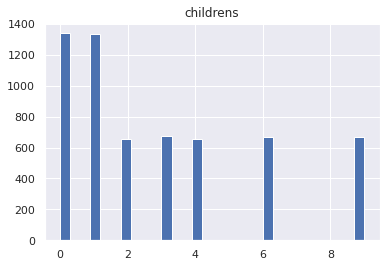

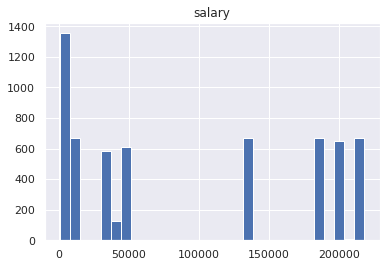

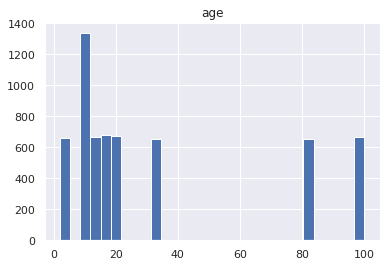

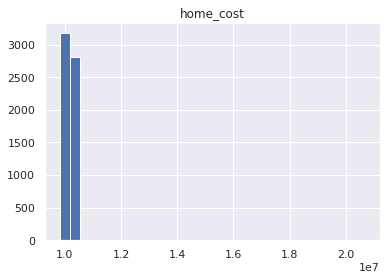

In [781]:
normally_distributed_features = []

for feature in num_cols:
    plt.hist(df[feature], bins=30)
    plt.title(feature)
    plt.show()

    # Тестируем на нормальное распределение
    k2, p = scipy.stats.normaltest(df['age'])
    if p < 1e-3:
        normally_distributed_features.append(feature)
    

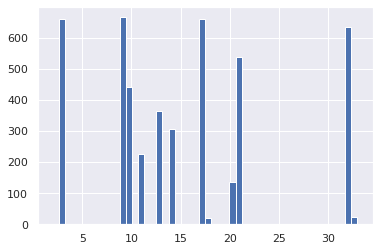

In [782]:
df[df['age'] < 40]['age'].hist(bins=50)

Нормально распределенные признаки

In [783]:
for feature in normally_distributed_features:
    print(feature)

childrens
salary
age
home_cost


# Чистка датасета (5 баллов)
* Есть ли дубли в данных? 
* Есть ли пропуски в данных? 
* Как стоит поступить с выбросами? (удалить или заменить \ `dropna()` или `fillna()` )
* Удалить бесмысленные признаки (`drop()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

In [784]:
# Удалено 500 дубликатов

print('Shape before removing duplicates: {}'.format(df.shape))
df = df.drop_duplicates()
print('Shape after removing duplicates: {}'.format(df.shape))

Shape before removing duplicates: (6000, 17)
Shape after removing duplicates: (5500, 17)


In [785]:
# пропуски только в колонке drive_info

for feature in features:
    if any(df[feature].isnull()):
        print(feature)

drive_info


In [786]:
df = df.drop(['id', 'drive_info'], axis=1)

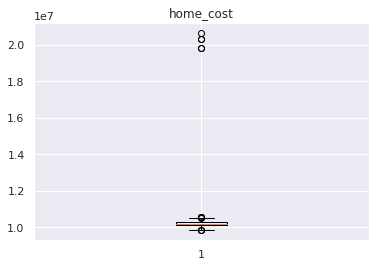

In [787]:
# Смотрим на выбросы в home_cost

plt.boxplot(df['home_cost'])
plt.title('home_cost')
plt.show()

На диаграмме "ящик с усами" (boxplot) видим три выброса. Они все расположены в районе 2.0 * 1e7. Более того, остальная часть данных лежит в диапазоне от 0 до 1.2 * 1e7, это видно и на гистограмме:

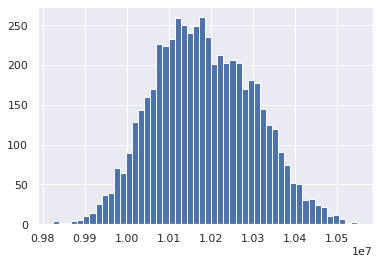

In [788]:
df[df['home_cost'] < 1.3 * 1e7]['home_cost'].hist(bins=50)

Убираем выбросы

In [789]:
df = df[df['home_cost'] < 1.3 * 1e7]

# Изучение зависимых признаков (5 балла). 
* Построить матрицу корреляций
* Визуализировать матрицу корреляции с помощью heatmap
* Сделать выводы по самым скоррелированные признакам
* Построить график зависимости между двумя самыми зависимыми признаками



Считаем корреляцию по Пирсону. Я исключил поля Profession, так как если строить Heat Map без One Hot Encoding, то наиболее скоррелированные признаки не меняются, а смотреть удобнее на маленький Heat Map.

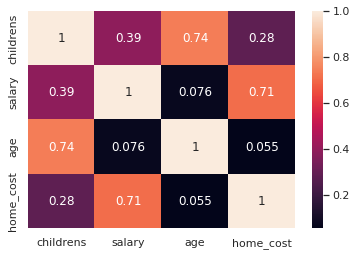

In [790]:
corr_matrix = df[num_cols + cat_cols].corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)

**Наиболее скоррелированные признаки** - возраст и количество детей.

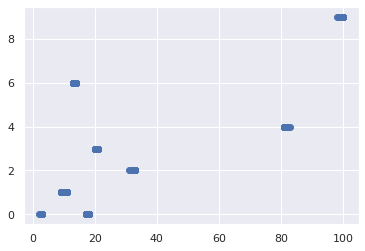

In [791]:
plt.scatter(df['age'], df['childrens'])

# Нормировка признаков (3 балла)
* Отнормировать данные
* Обосновать выбор нормировки

In [792]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 

norm_df = df.copy()
norm_df = norm_df[learning_cols] # включаем в нормировку только те признаки, по которым производим обучение

for column in num_cols:
    norm_df[column] = MinMaxScaler().fit_transform(np.array(norm_df[column].values).reshape(-1, 1))

In [793]:
norm_df.head()

,childrens,salary,age,home_cost,sex,was_married
0,0.444444,0.203134,0.816327,0.293560,1,1
1,0.222222,0.927245,0.306122,0.437003,1,1
2,0.666667,0.978699,0.122449,0.841566,1,1
3,0.111111,0.851998,0.081633,0.302187,0,0
4,1.000000,0.604625,0.989796,0.545610,1,1


# Выделить кластеры (6 баллов)
* Определить оптимальное количество кластеров с помощью правила локтя/осыпи
* Получить номера класстеров для каждого пользователя. 

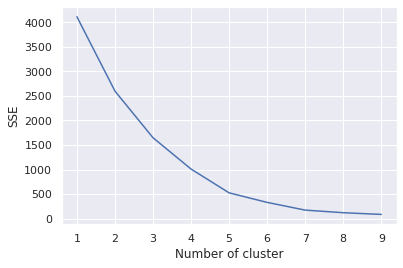

In [794]:
from sklearn.cluster import KMeans

# Используем Elbow Rule для определения оптимального числа кластеров

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(norm_df)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [795]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
   
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(norm_df)
    label = kmeans.labels_
    sil_coeff = silhouette_score(norm_df, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.4197656211204912
For n_clusters=3, The Silhouette Coefficient is 0.494647578906071
For n_clusters=4, The Silhouette Coefficient is 0.5828426313390083
For n_clusters=5, The Silhouette Coefficient is 0.6873806141772263
For n_clusters=6, The Silhouette Coefficient is 0.7340931428680203
For n_clusters=7, The Silhouette Coefficient is 0.7870404790796853
For n_clusters=8, The Silhouette Coefficient is 0.7958594833863525
For n_clusters=9, The Silhouette Coefficient is 0.7712063350636176
For n_clusters=10, The Silhouette Coefficient is 0.6771113818905606


Silhoutte Coefficient максимален для n_clusters=8. Однако, в представленном датасете 9 профессий. Скорее всего, кластеризация производится именно по профессии, поэтому выберем `n_clusters=9`.

In [796]:
clusterer = KMeans(n_clusters=9, max_iter=1000)
cluster_labels = clusterer.fit_predict(norm_df)

# Снизить размерность (6 баллов)

Воспользуйтесь методом `t-SNE ()` (или `PCA`, `U-MAP`)

ссылка на документацию:
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [797]:
from sklearn.decomposition import PCA
reducer = PCA(n_components=2)
data_x_y = reducer.fit_transform(norm_df)
data_x = data_x_y[:, 0]
data_y = data_x_y[:, 1]

In [798]:
import sklearn

# Нарисовать полученные кластеры (10 баллов)

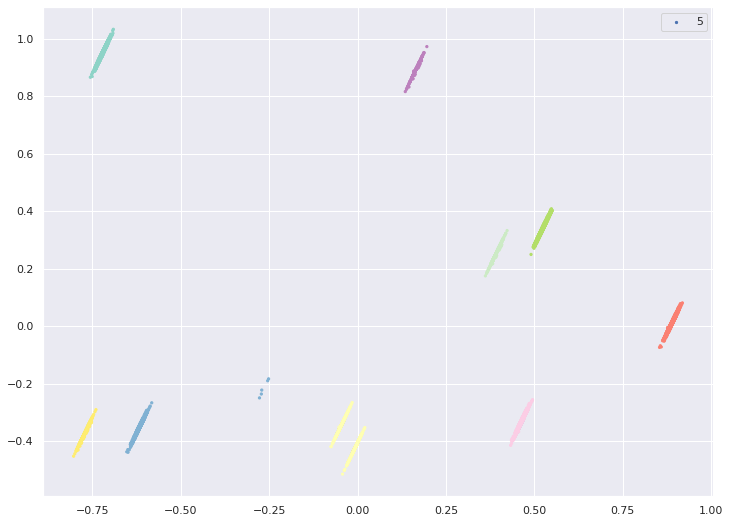

In [799]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
plt.scatter(data_x, data_y, c=cluster_labels, cmap ='Set3', s=5)
plt.legend(cluster_labels)
plt.show()

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**